## Load Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head(10)

,Sentence_id,New_Sentence,Type,Sentiment,Type_Encoded,New_Sentence_No_Stopwords,Sentence_Length,Sentiment_No_Stopwords
0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility,0.011667,3,Author and/or Review architecture/design techn...,17,0.080000
1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility,0.250000,3,"able develop custom dynamic shape, object scri...",10,0.250000
2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement,0.053333,2,Experience working crosslly larger Engineering...,10,0.053333
3,GERSKL27235,"Previous business experience, including but no...",Skill,-0.065476,4,"Previous business experience, including limite...",14,-0.119048
4,HONSSK18415,Delivering fast and right the first time.,SoftSkill,0.245238,5,Delivering fast right first time.,5,0.245238
5,INDRES9494,Track department expenses and capital budget .,Responsibility,0.000000,3,Track department expenses capital budget .,6,0.000000
6,HONRES51852,Meet performance metrics.,Responsibility,0.000000,3,Meet performance metrics.,3,0.000000
7,UAEREQ34683,YOU MUST HAVEBachelors degree in Engineering.,Requirement,0.000000,2,MUST HAVEBachelors degree Engineering.,4,0.000000
8,UAEREQ4612,After COVID-19: Ability to travel to manufactu...,Requirement,0.000000,2,COVID-19: Ability travel manufacturing site(s)...,9,0.000000
9,INDEDU42721,Six Sigma qualification to at least Green Bel...,Education,-0.250000,0,Six Sigma qualification least Green Belt level.,7,-0.250000


## Model 1 - Logistic Regression

In [4]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
# Pisahkan fitur dan label
X = df['New_Sentence_No_Stopwords']
y = df['Type_Encoded']

### Split Data Train & Test

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build Logistic Regression Model

In [7]:
# Feature extraction TF-IDF
tfidf = TfidfVectorizer(max_features=7000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [8]:
# Membangun model LR
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Model Evaluation

In [9]:
# Prediksi pada data test
lr_pred_train = lr.predict(X_train_tfidf)
lr_pred_test = lr.predict(X_test_tfidf)

# Akurasi Training dan Test
train_accuracy = accuracy_score(y_train, lr_pred_train)
test_accuracy = accuracy_score(y_test, lr_pred_test)
print(f"Akurasi Training: {train_accuracy * 100:.2f}%")
print(f"Akurasi Test: {test_accuracy * 100:.2f}%")

Akurasi Training: 80.34%
Akurasi Test: 74.85%


In [10]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, lr_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       909
           1       0.97      0.89      0.93      1781
           2       0.60      0.65      0.63      2723
           3       0.81      0.92      0.86      3144
           4       0.63      0.50      0.56      1370
           5       0.70      0.67      0.68      1873

    accuracy                           0.75     11800
   macro avg       0.76      0.73      0.74     11800
weighted avg       0.75      0.75      0.75     11800



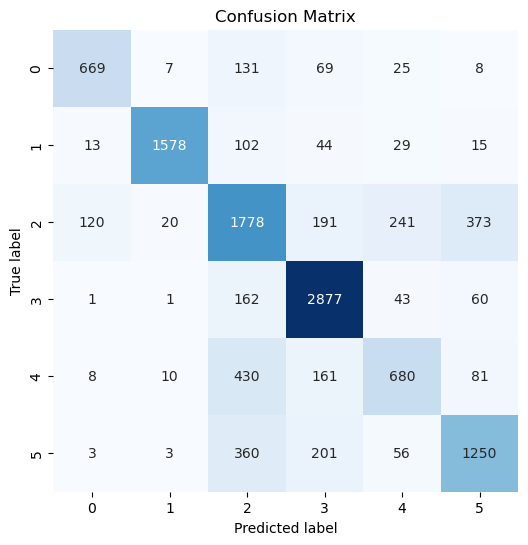

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred_test)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5])
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### Cross Validation

In [12]:
# Buat model Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)

# Dapatkan prediksi untuk setiap fold menggunakan cross_val_predict
y_pred_cv = cross_val_predict(lr, X_train_tfidf, y_train, cv=5)

# Tampilkan hasil cross-validation
cv_scores = cross_val_score(lr, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of CV accuracy: {np.std(cv_scores):.2f}")

# Tampilkan classification report
print("\nClassification Report for Cross-Validation:")
print(classification_report(y_train, y_pred_cv, target_names=[str(i) for i in range(6)]))


Cross-validation scores: [0.74597458 0.74788136 0.74067797 0.74184322 0.75622418]
Mean CV accuracy: 0.75
Standard Deviation of CV accuracy: 0.01

Classification Report for Cross-Validation:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      3631
           1       0.98      0.90      0.94      7296
           2       0.62      0.65      0.63     11155
           3       0.79      0.92      0.85     12113
           4       0.60      0.47      0.53      5463
           5       0.71      0.67      0.69      7541

    accuracy                           0.75     47199
   macro avg       0.75      0.72      0.73     47199
weighted avg       0.75      0.75      0.74     47199



### Hyperparameter Tuning

In [13]:
# Tentukan parameter grid untuk tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg'],
}

# Menambahkan pengecekan untuk memastikan kombinasi solver yang sesuai dengan penalty
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'] if 'l1' in param_grid['penalty'] else ['lbfgs', 'sag', 'newton-cg'],
}

# Inisialisasi model Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)

# Gunakan GridSearchCV untuk mencari kombinasi parameter terbaik
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Latih model dengan GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Tampilkan hasil parameter terbaik
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [14]:
# Gunakan model terbaik dari GridSearchCV untuk prediksi
best_lr = grid_search.best_estimator_

# Prediksi menggunakan model terbaik pada data test
y_pred_best_lr = best_lr.predict(X_test_tfidf)

# Tampilkan akurasi
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best_lr):.2f}")

# Tampilkan Classification Report
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best_lr, target_names=[str(i) for i in range(6)]))

Test Accuracy: 0.75

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       909
           1       0.97      0.89      0.93      1781
           2       0.60      0.65      0.63      2723
           3       0.79      0.92      0.85      3144
           4       0.66      0.46      0.54      1370
           5       0.71      0.67      0.69      1873

    accuracy                           0.75     11800
   macro avg       0.76      0.72      0.74     11800
weighted avg       0.75      0.75      0.74     11800

